<a href="https://colab.research.google.com/github/parvathi231/evaluating-classification-model/blob/main/7_Validating_Model_Ad_sale_prediction_from_existing_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Dataset file from Local Directory

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving DigitalAd_dataset.csv to DigitalAd_dataset.csv


# Loading Dataset

In [ ]:
dataset = pd.read_csv('DigitalAd_dataset.csv')

# Summarise Dataset

In [ ]:
print(dataset.shape)
print(dataset.head(6))

(400, 3)
   Age  Salary  Status
0   18   82000       0
1   29   80000       0
2   47   25000       1
3   45   26000       1
4   46   28000       1
5   48   29000       1


# Segregating Dataset

In [ ]:
x = dataset.iloc[:,:-1].values
x

array([[    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],
       [    27,  17000],
       [    33,  51000],
       [    35, 108000],
       [    30,  15000],
       [    28,  84000],
       [    23,  20000],
       [    25,  79000],
       [    27,  54000],
       [    30, 135000],
       [    31,  89000],
       [    24,  32000],
       [    18,  44000],
       [    29,  83000],
       [    35,  23000],


In [ ]:
y = dataset.iloc[:,-1].values
y

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,

# Splitting Dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import  StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Training

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Prediction for all test data

In [ ]:
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


# Evaluating Model

confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[61  0]
 [20 19]]


# Accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy: {0}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy: 80.0%


# Roc curve

No skill:Roc AUC=50.000
Logistic Skill: ROC AUC=92.980


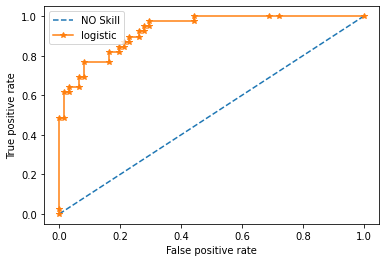

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt 

nsProbability = [0 for _ in range(len(y_test))]
lsProbability = model.predict_proba(x_test)
lsProbability = lsProbability[:,1]
nsAUC = roc_auc_score(y_test,nsProbability)
lrAUC = roc_auc_score(y_test,lsProbability)

print('No skill:Roc AUC=%.3f'%(nsAUC*100))
print('Logistic Skill: ROC AUC=%.3f' %(lrAUC*100))
 
nsFP,nsTP,_ = roc_curve(y_test,nsProbability)
lrFP,lrTP,_ = roc_curve(y_test,lsProbability)

plt.plot(nsFP,nsTP,linestyle='--',label='NO Skill')
plt.plot(lrFP,lrTP,marker='*',label='logistic')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.legend()
plt.show()

# cross validation score

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10,random_state=100)
result = cross_val_score(model,x,y,cv=kfold)
print('cross validation score: %.2f%%'%(result.mean()*100.0))

cross validation score: 64.25%


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


# Stratisfied k-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  StratifiedKFold
skfold = StratifiedKFold(n_splits=3,random_state=100)
model_skfold = LogisticRegression()
results_skfold = cross_val_score(model_skfold,x,y,cv=skfold)
print('Stratified kfold score:%.2f%%'%(results_skfold.mean()*100.0))

Stratified kfold score:64.50%


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


# Cummulative Accuracy Profile(cap)curve

100
39


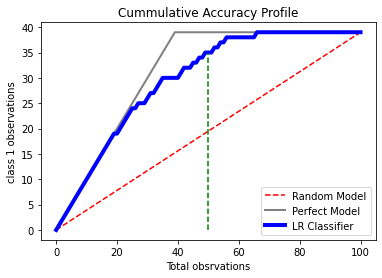

In [ ]:
total=len(y_test)
print(total)
class_1_count=np.sum(y_test)
print(class_1_count)
class_0_count=total-class_1_count
plt.plot([0,total],[0,class_1_count],c='r',linestyle='--',label='Random Model')

plt.plot([0,class_1_count,total],
         [0,class_1_count,class_1_count],
         c='grey',
         linewidth = 2,
         label='Perfect Model')
probs=model.predict_proba(x_test)
probs=probs[:,1]
model_y=[y for _, y in sorted(zip(probs,y_test),reverse=True)]
y_values=np.append([0],np.cumsum(model_y))
x_values=np.arange(0,total +1)

plt.plot(x_values,
         y_values,
         c='b',
         label='LR Classifier',
         linewidth=4)
index=int((50*total/100))
plt.plot([index,index],[0,y_values[index]],c='g',linestyle='--')
class_1_observed=y_values[index] * 100/max(y_values)
plt.xlabel('Total obsrvations')
plt.ylabel('class 1 observations')
plt.title('Cummulative Accuracy Profile')
plt.legend(loc='lower right')